# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
import sys
sys.path.append('C:/Users/dark_/Documents/GitHub/python-api-challenge/')
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {
        'apiKey': weather_api_key,
        'q': city,
        'units': 'metric'
    }

    city_weather = requests.get(url, params).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(5)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | yasothon
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | broken hill
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | nedroma
Processing Record 9 of Set 1 | yunfu
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | bich'vinta
Processing Record 18 of Set 1 | chadan
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | cran

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.400,168.3500,11.73,91,65,2.42,NZ,1683590288
1,adamstown,-25.066,-130.1015,21.53,56,100,5.46,PN,1683590293
2,yasothon,15.750,104.1333,29.46,69,100,2.73,TH,1683590299
3,port-aux-francais,-49.350,70.2167,6.34,95,100,19.75,TF,1683590305
4,broken hill,-31.950,141.4333,11.70,63,1,6.41,AU,1683590310


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.400,168.3500,11.73,91,65,2.42,NZ,1683590288
1,adamstown,-25.066,-130.1015,21.53,56,100,5.46,PN,1683590293
2,yasothon,15.750,104.1333,29.46,69,100,2.73,TH,1683590299
3,port-aux-francais,-49.350,70.2167,6.34,95,100,19.75,TF,1683590305
4,broken hill,-31.950,141.4333,11.70,63,1,6.41,AU,1683590310


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

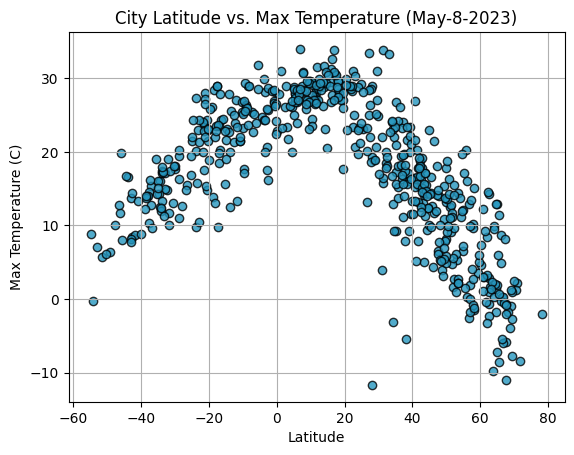

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', c='#2596be',alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (May-8-2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

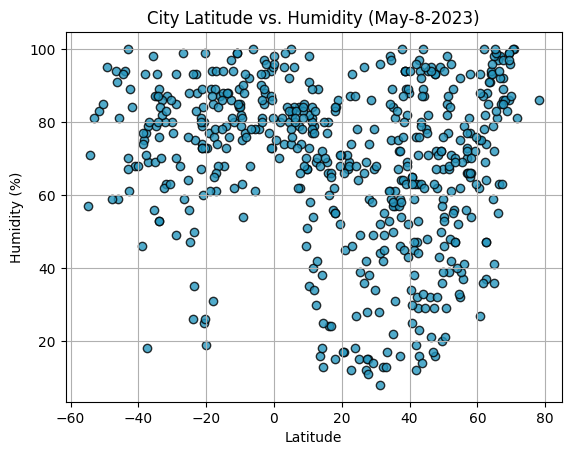

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', c='#2596be',alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (May-8-2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

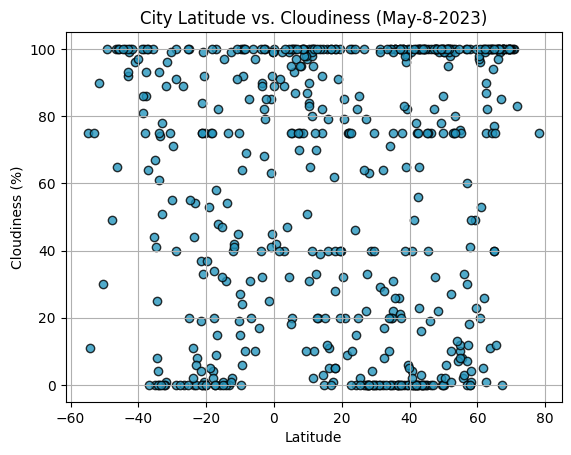

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', c='#2596be',alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (May-8-2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

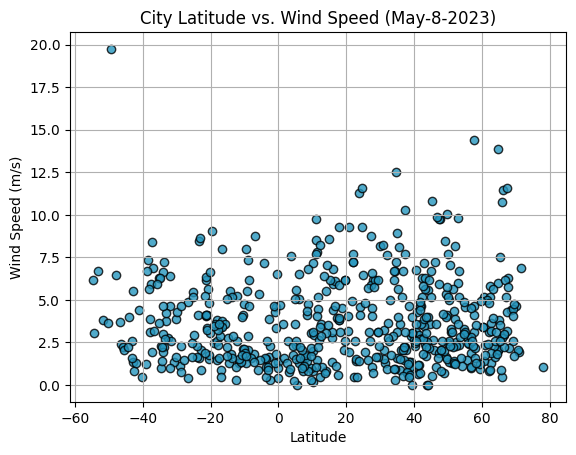

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', c='#2596be',alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (May-8-2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yasothon,15.7500,104.1333,29.46,69,100,2.73,TH,1683590299
7,nedroma,35.0136,-1.7480,17.27,50,22,1.60,DZ,1683590327
8,yunfu,22.9306,112.0373,20.70,93,100,1.41,CN,1683590333
9,fortuna,40.5982,-124.1573,16.51,65,40,3.09,US,1683590338
10,lompoc,34.6391,-120.4579,22.08,75,20,12.52,US,1683590344


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,11.73,91,65,2.42,NZ,1683590288
1,adamstown,-25.0660,-130.1015,21.53,56,100,5.46,PN,1683590293
3,port-aux-francais,-49.3500,70.2167,6.34,95,100,19.75,TF,1683590305
4,broken hill,-31.9500,141.4333,11.70,63,1,6.41,AU,1683590310
5,puerto natales,-51.7236,-72.4875,5.76,83,90,3.83,CL,1683590115


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8554198517620389


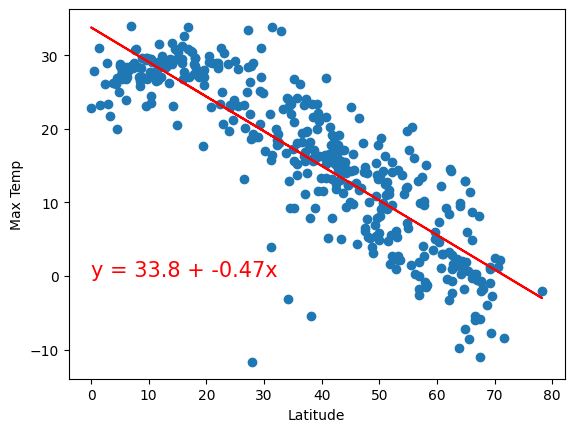

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (0,0), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.7822868999907762


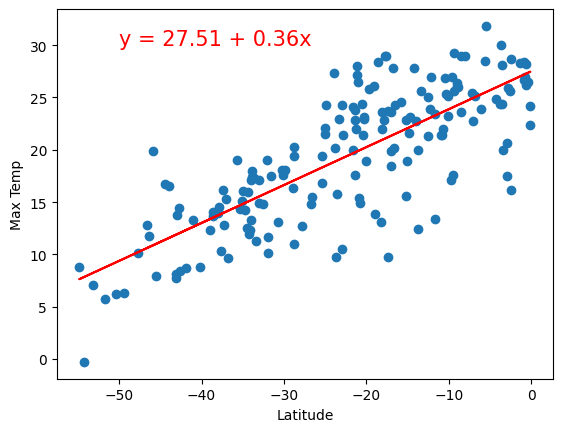

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (-50,30), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** In both cases, there is a clear trend that as the Lat gets closer to the equator (Lat = 0), the Max Temp tends to be higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0998279992605777


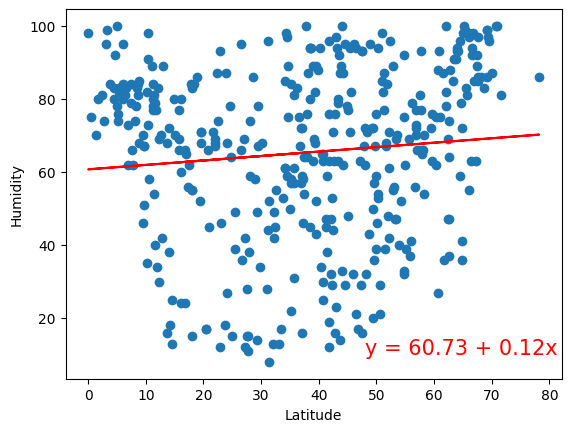

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (48,10), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.17470211699360316


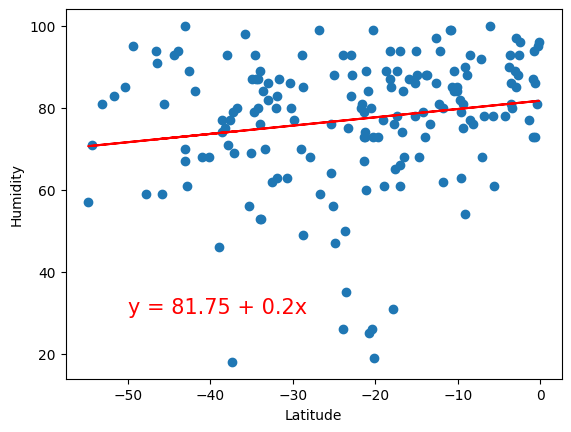

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (-50,30), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** In both cases, there is a vague trend that as the Lat gets closer to the equator (Lat = 0), the Humidity tends to be higher. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06162745981445397


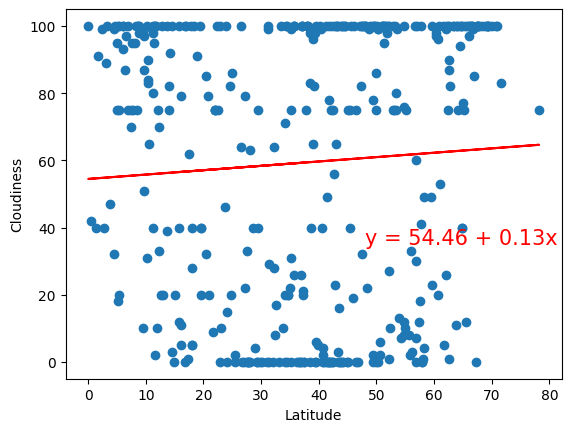

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (48,35), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: -0.11608136038206415


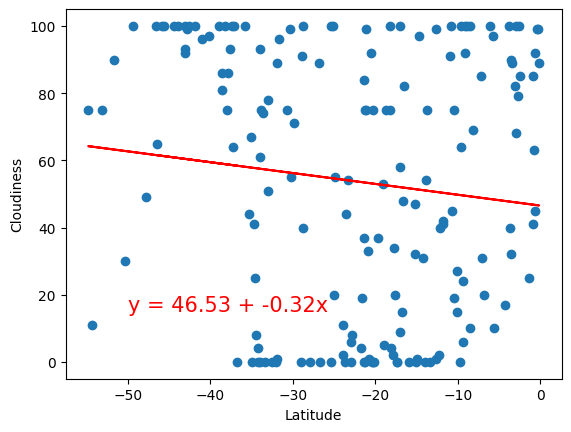

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (-50,15), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** For both, Cloudiness rises slightly as the City's Latitude moves away from the Equatior (Lat = 0)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03732619167785794


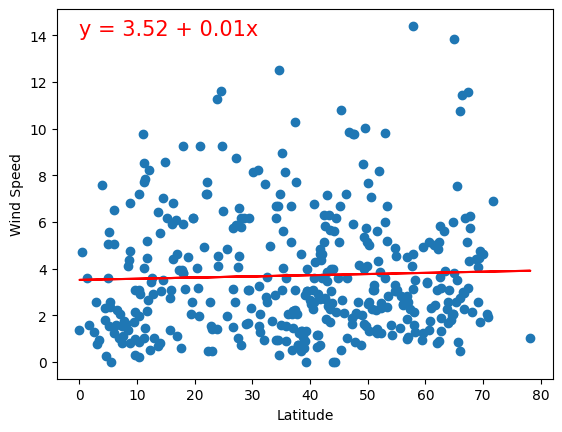

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (0,14), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.20810925260362742


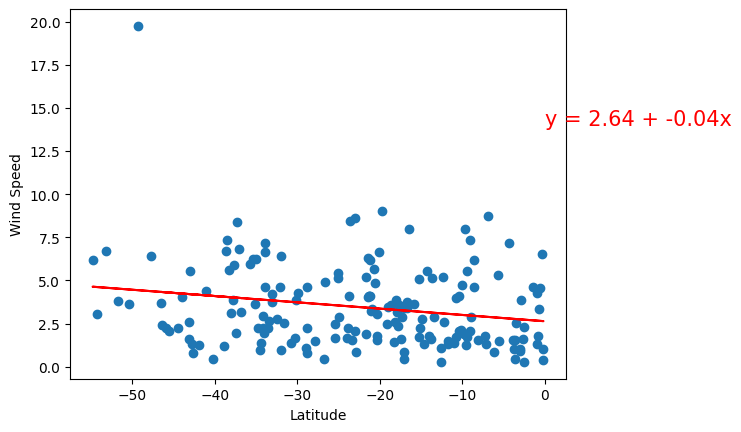

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (0,14), color='r', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** For both, Wind Speed, rises very slightly as the City's Latitude moves away from the Equatior (Lat = 0); the low r value indicates the correlation is very weak. 